In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
today_num = int(pd.Timestamp.today().date().strftime("%Y%m%d"))
offset = 0
print(f"our seed is {today_num + offset}")
np.random.seed(today_num + offset)

our seed is 20230716


In [3]:
our_dtype = 'float32'
L = pd.read_csv("manuscript-simdata-n=1000-m=20.csv").iloc[:,1:]
n,m = L.shape
print(L.shape)

(1000, 20)


In [4]:
print(L.head())

         V1        V2        V3        V4        V5        V6        V7  \
0  1.000000  0.995377  0.992173  0.986793  0.977836  0.963142  0.939592   
1  0.682236  0.688313  0.692514  0.699550  0.711200  0.730126  0.759874   
2  1.000000  0.999407  0.998969  0.998185  0.996742  0.994005  0.988656   
3  1.000000  0.995040  0.991605  0.985843  0.976266  0.960596  0.935588   
4  1.000000  0.995103  0.991712  0.986022  0.976562  0.961075  0.936340   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.903204  0.849939  0.777566  0.687952  0.587833  0.486622  0.392711   
1  0.804044  0.863485  0.930824  0.985704  1.000000  0.955866  0.859218   
2  0.978066  0.957503  0.920060  0.859007  0.772689  0.667782  0.556582   
3  0.897189  0.841483  0.766664  0.675252  0.574499  0.473870  0.381386   
4  0.898317  0.843067  0.768704  0.677623  0.576984  0.476243  0.383491   

        V15       V16       V17       V18       V19       V20  
0  0.311118  0.243424  0.188945  0

In [5]:
L = L.values.astype(our_dtype)

In [6]:
w = np.ones(n) / n
w = w.astype(our_dtype)

In [60]:
def run_subprob_mu(L, w, seed = 1, num_iter = 10000, num_print = 500, eps = 1e-8):
    
    n,m = L.shape
    np.random.seed(seed * 2023)
    
    pi = np.random.rand(m)
    pi = pi / pi.sum()
    
    obj_func = np.zeros(num_iter)
    
    for i in range(num_iter):
        pi = pi * (L.T @ (w / (L @ pi + eps)))
        obj_func[i] = -(np.log(L @ pi + eps) * w).sum()
        if i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return pi, obj_func

In [61]:
temp_time = time.time()
res_mu = run_subprob_mu(L, w)
time_mu = time.time() - temp_time
print(f"took {time_mu} seconds")

round 500: obj 0.1882203476585537
round 1000: obj 0.18807188702550304
round 1500: obj 0.1880181345086205
round 2000: obj 0.18798637725291276
round 2500: obj 0.18796345366297362
round 3000: obj 0.18794477482491653
round 3500: obj 0.18792839510048284
round 4000: obj 0.18791345340408117
round 4500: obj 0.18789957081655867
round 5000: obj 0.1878865857363582
round 5500: obj 0.18787443332558035
round 6000: obj 0.18786308944295435
round 6500: obj 0.18785254394464695
round 7000: obj 0.18784278787086686
round 7500: obj 0.18783380757235799
round 8000: obj 0.18782558249853146
round 8500: obj 0.18781808497434932
round 9000: obj 0.18781128103566377
round 9500: obj 0.18780513176944894
round 10000: obj 0.18779959481908856
took 1.2280001640319824 seconds


In [9]:
time_mu

1.2300002574920654

In [10]:
def run_subprob_mu_with_normalize(L, w, seed = 1, num_iter = 10000, num_print = 500, eps = 1e-8):
    
    n,m = L.shape
    np.random.seed(seed * 2023)
    
    pi = np.random.rand(m)
    pi = pi / pi.sum()
    
    obj_func = np.zeros(num_iter)
    
    for i in range(num_iter):
        pi = pi * (L.T @ (w / (L @ pi + eps)))
        pi = pi / pi.sum()
        obj_func[i] = -(np.log(L @ pi + eps) * w).sum()
        if i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return pi, obj_func

In [11]:
temp_time = time.time()
res_mu_with_normalize = run_subprob_mu_with_normalize(L, w)
time_mu_with_normalize = time.time() - temp_time
print(f"took {time_mu_with_normalize} seconds")

round 500: obj 0.1882203789986142
round 1000: obj 0.18807191839666088
round 1500: obj 0.18801816588397488
round 2000: obj 0.1879864086266533
round 2500: obj 0.18796348503366167
round 3000: obj 0.18794480619272957
round 3500: obj 0.18792842646602653
round 4000: obj 0.18791348476790767
round 4500: obj 0.1878996021790445
round 5000: obj 0.18788661709774068
round 5500: obj 0.18787446468600666
round 6000: obj 0.18786312080252332
round 6500: obj 0.18785257530343097
round 7000: obj 0.18784281922892815
round 7500: obj 0.18783383892975203
round 8000: obj 0.187825613855313
round 8500: obj 0.1878181163305686
round 9000: obj 0.18781131239136886
round 9500: obj 0.187805163124685
round 10000: obj 0.1877996261739013
took 1.2679998874664307 seconds


In [12]:
def run_subprob_scipi(L, w, seed = 1, num_iter = 10000, num_print = 500, eps = 1e-8):
    
    n,m = L.shape
    np.random.seed(seed * 2023)
    
    pi = np.random.rand(m)
    pi = pi / pi.sum()
    
    obj_func = np.zeros(num_iter)
    
    for i in range(num_iter):
        pi = pi * np.square(L.T @ (w / (L @ pi + eps)))
        pi = pi / pi.sum()
        obj_func[i] = -(np.log(L @ pi + eps) * w).sum()
        if i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return pi, obj_func

In [13]:
temp_time = time.time()
res_scipi = run_subprob_scipi(L, w)
time_scipi = time.time() - temp_time
print(f"took {time_scipi} seconds")

round 500: obj 0.18807185489163494
round 1000: obj 0.18798638999847855
round 1500: obj 0.18794479370802092
round 2000: obj 0.18791347429240499
round 2500: obj 0.18788660787119157
round 3000: obj 0.18786311270879844
round 3500: obj 0.1878428122592007
round 4000: obj 0.18782560797755093
round 4500: obj 0.18781130752921144
round 5000: obj 0.18779962221739332
round 5500: obj 0.18779020802826946
round 6000: obj 0.18778270854068993
round 6500: obj 0.18777678614186444
round 7000: obj 0.18777213981063934
round 7500: obj 0.1877685122331299
round 8000: obj 0.18776568993890777
round 8500: obj 0.18776349958203906
round 9000: obj 0.18776180254543298
round 9500: obj 0.18776048919625515
round 10000: obj 0.18775947350225497
took 1.2669999599456787 seconds


In [14]:
# lots of papers about projection onto the simplex
# e.g.
# https://arxiv.org/pdf/1101.6081.pdf
# https://math.stackexchange.com/questions/3778014/matlab-python-euclidean-projection-on-the-simplex-why-is-my-code-wrong
# https://stanford.edu/~jduchi/projects/DuchiShSiCh08.html
# https://link.springer.com/article/10.1007/s10107-015-0946-6
# https://gist.github.com/mblondel/6f3b7aaad90606b98f71

In [15]:
def proj_simplex(v):
    u = (v > 0) * v
    u.sort()
    u = u[::-1]
    sv = u.cumsum()
    rho = np.where(u > (sv - 1) / np.arange(1, len(u)+1))[0][-1]
    theta = np.maximum(0.0, (sv[rho] - 1.0) / (rho+1))
    v = np.maximum(v - theta, 0.0)
    return v

In [16]:
def run_subprob_pgd(L, w, seed = 1, stepsize = 1.0, num_iter = 10000, num_print = 500, eps = 1e-8):
    
    n,m = L.shape
    np.random.seed(seed * 2023)
    
    pi = np.random.rand(m)
    pi = pi / pi.sum()
    
    obj_func = np.zeros(num_iter)
    
    for i in range(num_iter):
        pi = pi + stepsize * (L.T @ (w / (L @ pi + eps)))
        pi = proj_simplex(pi)
        obj_func[i] = -(np.log(L @ pi + eps) * w).sum()
        if i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return pi, obj_func

In [55]:
def check_sufficient_decrease(obj, obj_new, grad, grad_proj, alpha = 1.0):
    return obj_new - obj - alpha * (grad * grad_proj).sum()

In [56]:
def run_subprob_pgd_with_linesearch(L, w, seed = 1, init_stepsize = 1.0, num_linesearch = 20, alpha = 1.0, num_iter = 10000, num_print = 500, eps = 1e-8):
    
    n,m = L.shape
    np.random.seed(seed * 2023)
    
    pi = np.random.rand(m)
    pi = pi / pi.sum()
    
    obj_func = np.zeros(num_iter)
    
    for i in range(num_iter):
        stepsize = init_stepsize
        if i == 0:
            obj = -(np.log(L @ pi + eps) * w).sum()
        else:
            obj = obj_func[i-1]
        grad = -(L.T @ (w / (L @ pi + eps)))
        for j in range(num_linesearch):
            pi_temp = pi - stepsize * grad
            pi_temp = proj_simplex(pi_temp)
            grad_proj = pi_temp - pi
            obj_temp = -(np.log(L @ pi_temp + eps) * w).sum()
            if check_sufficient_decrease(obj, obj_temp, grad, grad_proj, alpha) < 0.0:
                break
            else:
                stepsize = stepsize * 0.5
        #print(i, stepsize)
        pi = pi - stepsize * grad
        pi = proj_simplex(pi)
        obj_func[i] = -(np.log(L @ pi + eps) * w).sum()
        if i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return pi, obj_func

In [57]:
temp_time = time.time()
res_pgd_with_linesearch = run_subprob_pgd_with_linesearch(L, w, num_iter = 10000)
time_pgd_with_linesearch = time.time() - temp_time
print(f"took {time_pgd_with_linesearch} seconds")

round 500: obj 0.32920164539734387
round 1000: obj 0.3280478010822514
round 1500: obj 0.3268982376188298
round 2000: obj 0.32575293502085156
round 2500: obj 0.32461187355591753
round 3000: obj 0.32347503374367403
round 3500: obj 0.3223423963540825
round 4000: obj 0.3212139424057493
round 4500: obj 0.32008965316430865
round 5000: obj 0.31896951014086583
round 5500: obj 0.3178534950904914
round 6000: obj 0.31674159001077773
round 6500: obj 0.3156337771404476
round 7000: obj 0.3145300389580211
round 7500: obj 0.3134593879877409
round 8000: obj 0.3125942873891239
round 8500: obj 0.3117320379548474
round 9000: obj 0.3108726309815315
round 9500: obj 0.3100160578879336
round 10000: obj 0.3091623102147081
took 15.42900037765503 seconds


In [25]:
temp_time = time.time()
res_pgd0 = run_subprob_pgd(L, w, stepsize = 0.1)
time_pgd0 = time.time() - temp_time
print(f"took {time_pgd0} seconds")

round 500: obj 0.18833446585034003
round 1000: obj 0.18816481892357712
round 1500: obj 0.1881080730567748
round 2000: obj 0.18805682239908011
round 2500: obj 0.18801590659603967
round 3000: obj 0.18799998884385494
round 3500: obj 0.1879841846404984
round 4000: obj 0.18796849313533232
round 4500: obj 0.1879529135680602
round 5000: obj 0.18793744518307026
round 5500: obj 0.1879220872294059
round 6000: obj 0.1879122527642245
round 6500: obj 0.1879071342757143
round 7000: obj 0.18790202805124498
round 7500: obj 0.1878969340570415
round 8000: obj 0.1878918522653425
round 8500: obj 0.187886782648443
round 9000: obj 0.1878817251786976
round 9500: obj 0.18787667982851655
round 10000: obj 0.18787164657036975
took 1.2390000820159912 seconds


In [31]:
temp_time = time.time()
res_pgd1 = run_subprob_pgd(L, w, stepsize = 0.18)
time_pgd1 = time.time() - temp_time
print(f"took {time_pgd1} seconds")

round 500: obj 0.19056486048315818
round 1000: obj 0.188024529233348
round 1500: obj 0.1879909471681458
round 2000: obj 0.18796269643809682
round 2500: obj 0.18793480748100236
round 3000: obj 0.1879124688044811
round 3500: obj 0.187903263416496
round 4000: obj 0.18789409768396842
round 4500: obj 0.18788497143756616
round 5000: obj 0.18787588451604104
round 5500: obj 0.18786683675874816
round 6000: obj 0.18785782800564343
round 6500: obj 0.1878488580972824
round 7000: obj 0.1878399268748184
round 7500: obj 0.18783103417999958
round 8000: obj 0.18782478745646514
round 8500: obj 0.18782173326608326
round 9000: obj 0.1878186836218088
round 9500: obj 0.18781563851701316
round 10000: obj 0.18781259794528374
took 1.2350001335144043 seconds


In [33]:
temp_time = time.time()
res_pgd2 = run_subprob_pgd(L, w, stepsize = 0.19)
time_pgd2 = time.time() - temp_time
print(f"took {time_pgd2} seconds")

round 500: obj 0.191307559493642
round 1000: obj 0.19112570382707433
round 1500: obj 0.1910089805319747
round 2000: obj 0.19094924744175856
round 2500: obj 0.19090860036312676
round 3000: obj 0.19086740494977777
round 3500: obj 0.19082554386840322
round 4000: obj 0.19078287190016222
round 4500: obj 0.1907392052983274
round 5000: obj 0.19073217222256855
round 5500: obj 0.19071656763129105
round 6000: obj 0.1907007899482745
round 6500: obj 0.19068482434646444
round 7000: obj 0.19066865418256584
round 7500: obj 0.19065226066701288
round 8000: obj 0.19063562245281
round 8500: obj 0.1906187151174611
round 9000: obj 0.19060151050195928
round 9500: obj 0.19058397585552508
round 10000: obj 0.1905660727114906
took 1.2290000915527344 seconds


In [23]:
np.random.seed(1 * 2023)
    
pi = np.random.rand(m)
pi = pi / pi.sum()
init_obj = -(np.log(L @ pi + 1e-8) * w).sum()

def get_rel(res, res_max):
    return (res - res_max) / (init_obj - res_max)

(0.0, 10000.0)

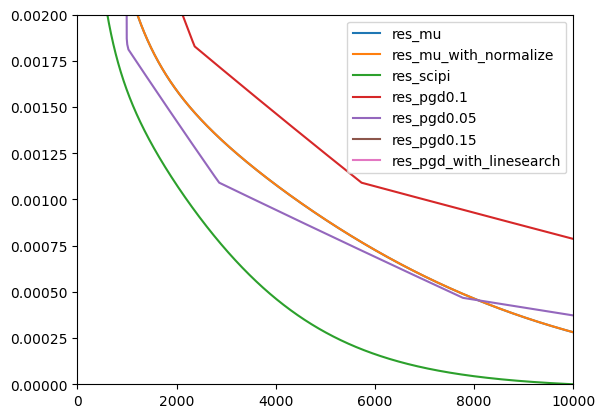

In [62]:
import matplotlib.pyplot as plt
rel_mu = get_rel(res_mu[1], res_scipi[1][-1])
rel_mu_with_normalize = get_rel(res_mu_with_normalize[1], res_scipi[1][-1])
rel_scipi = get_rel(res_scipi[1], res_scipi[1][-1])
rel_pgd0 = get_rel(res_pgd0[1], res_scipi[1][-1])
rel_pgd1 = get_rel(res_pgd1[1], res_scipi[1][-1])
rel_pgd2 = get_rel(res_pgd2[1], res_scipi[1][-1])
rel_pgd_with_linesearch = get_rel(res_pgd_with_linesearch[1], res_scipi[1][-1])
plt.plot(rel_mu)
plt.plot(rel_mu_with_normalize)
plt.plot(rel_scipi)
plt.plot(rel_pgd0)
plt.plot(rel_pgd1)
plt.plot(rel_pgd2)
plt.plot(rel_pgd_with_linesearch)
plt.legend(["res_mu", "res_mu_with_normalize", "res_scipi", "res_pgd0.1", "res_pgd0.05", "res_pgd0.15", "res_pgd_with_linesearch"])
plt.ylim([0.000, 0.002])
plt.xlim([0000,10000])